# Traveling salesman problem - Naive solution

In [16]:
from sys import maxsize 
from itertools import permutations
 
# implementation of traveling Salesman Problem 
def travellingSalesmanProblem(graph, s): 
 
    # store all vertex apart from source vertex 
    vertex = [] 
    for i in range(len(graph)): 
        if i != s: 
            vertex.append(i) 
 
    # store minimum weight Hamiltonian Cycle
    min_path = maxsize 
    next_permutation=permutations(vertex)
    for i in next_permutation:
 
        # store current Path weight(cost) 
        current_pathweight = 0
 
        # compute current path weight 
        k = s 
        for j in i: 
            current_pathweight += graph[k][j] 
            k = j 
        current_pathweight += graph[k][s] 
 
        # update minimum 
        min_path = min(min_path, current_pathweight) 
         
    return min_path

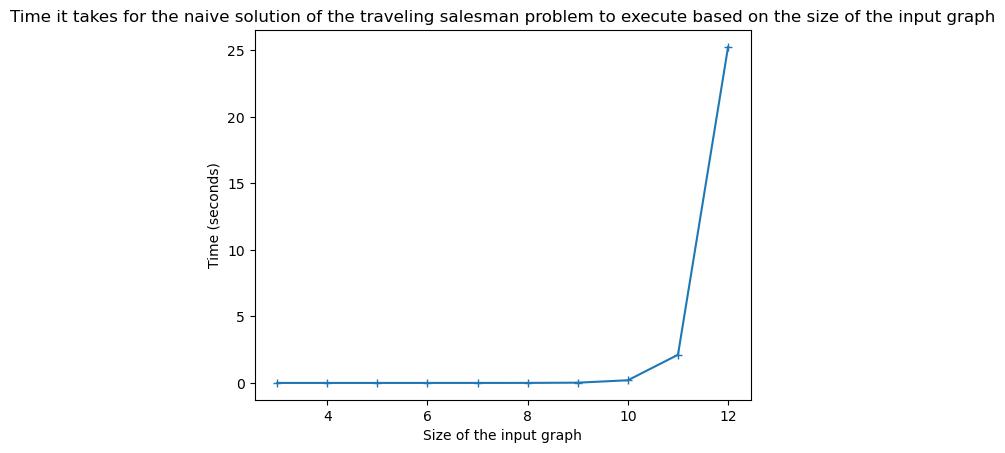

In [20]:
from random import randint
import time
import matplotlib.pyplot as plt

max_graph_size = 12
n_iterations = 3

time_table = [0 for i in range(max_graph_size + 1 - 3)]

for i in range(3, max_graph_size + 1):
    
    for j in range(n_iterations):
        graph = [[(randint(1, 60) if k!=l else 0) for l in range(i)] for k in range(i)]

        timer = time.time()

        travellingSalesmanProblem(graph, 0)

        time_table[i-3] += time.time()-timer
        
    time_table[i-3] = time_table[i-3] / n_iterations
    
x = range(3, 12+1)

y = time_table

plt.plot(x, y, marker = "+")
plt.title("Time it takes for the naive solution of the traveling salesman problem to execute based on the size of the input graph")
plt.xlabel("Size of the input graph")
plt.ylabel("Time (seconds)")
plt.show();

# Subset sum problem - Backtracking solution

In [18]:
# Print all subsets if there is at least one subset of set[]
# with a sum equal to the given sum
flag = False
 
def print_subset_sum(i, n, _set, target_sum, subset):
    global flag
    # If targetSum is zero, then there exists a subset
    if target_sum == 0:
        # Prints valid subset
        flag = True
        
        #print("[", end=" ")
        for element in subset:
            pass
            #print(element, end=" ")
        #print("]", end=" ")
        
        return
 
    if i == n:
        # Return if we have reached the end of the array
        return
 
    # Not considering the current element
    print_subset_sum(i + 1, n, _set, target_sum, subset)
 
    # Consider the current element if it is less than or equal to targetSum
    if _set[i] <= target_sum:
        # Push the current element into the subset
        subset.append(_set[i])
 
        # Recursive call for considering the current element
        print_subset_sum(i + 1, n, _set, target_sum - _set[i], subset)
 
        # Remove the last element after recursive call to restore subset's original configuration
        subset.pop()

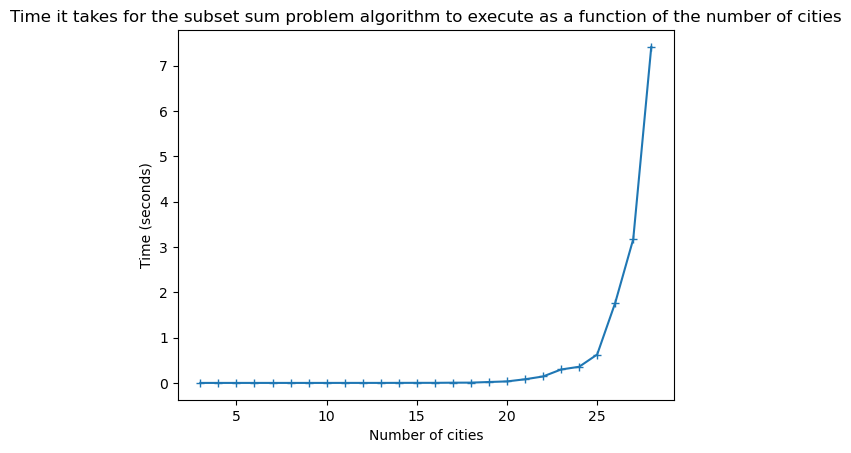

In [21]:
from random import randint
import time
import matplotlib.pyplot as plt
from itertools import permutations

max_city_quantity = 28
n_iterations = 10

time_table2 = [0 for i in range(max_city_quantity + 1 - 3)]

for i in range(3, max_city_quantity + 1):
    
    for j in range(n_iterations):
        cities = [randint(1, 60) for k in range(i)]
        
        target = len(cities) * 10

        timer = time.time()
        
        print_subset_sum(0, len(cities), cities, target, [])

        time_table2[i-3] += time.time() - timer
        
        target = False
        
    time_table2[i-3] = time_table2[i-3] / n_iterations

x = range(3, max_city_quantity+1)

plt.plot(x, time_table2, marker="+")
plt.title("Time it takes for the subset sum problem algorithm to execute as a function of the number of cities")
plt.xlabel("Number of cities")
plt.ylabel("Time (seconds)")
plt.show();